# Autoencoder

In [1]:
import torch
import torchvision
import torch.nn.functional as F
from torch import nn, optim
from torchvision import transforms, datasets

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [2]:
EPOCH = 50
BATCH_SIZE = 64
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print(f"Using Device {DEVICE}")

Using Device cpu


## DATASET

In [3]:
# Fashion MNIST 데이터셋 다운로드 및 데이터로더 선언
trainset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE,
    shuffle     = True,
    num_workers = 2
)

C:\Users\vkdvk\anaconda3\envs\DL\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
for i in train_loader:
    print(i)
    break

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  .

#### 총 3개의 stacked layer를 쌓아 만든 네트워크 구성

In [5]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3),   # 입력의 특징을 3차원으로 압축합니다
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # 픽셀당 0과 1 사이로 값을 출력합니다
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [6]:
autoencoder = Autoencoder().to(DEVICE)

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.005) 
# 최적화 함수 : Adam() --> SGD의 변형, 학습중인 기울기를 참고하여 학습 속도를 자동으로 변화

criterion = nn.MSELoss()
# MSE(Mean Squared Error) : 평균 제곱 오차

# 원본 이미지를 시각화 하기 (첫번째 열)
view_data = trainset.data[:5].view(-1, 28*28)
view_data = view_data.type(torch.FloatTensor)/255.

#### view_data shpae 확인

In [7]:
print(f"view_data.shape >>  {view_data.shape}\n\n")

view_data.shape >>  torch.Size([5, 784])




#### Train Module 

In [8]:
def train(autoencoder, train_loaader):
    autoencoder.train()
    for step,(x,label) in enumerate(train_loaader):
        x = x.view(-1,28*28).to(DEVICE)
        y = x.view(-1,28*28).to(DEVICE)
        label = label.to(DEVICE)
        
        encoded, decoded = autoencoder(x)
        
        loss = criterion(decoded, y) #forward에서 encoder, decoder 로 학습을 시키고 output값과 실제값의 loss 를 구함.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
  

#### 실제 train

EPOCH >> 1


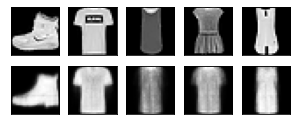

EPOCH >> 2


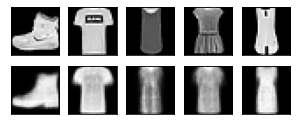

EPOCH >> 3


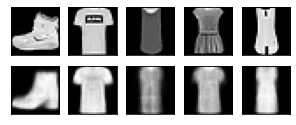

EPOCH >> 4


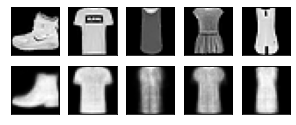

EPOCH >> 5


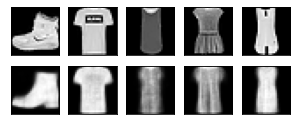

EPOCH >> 6


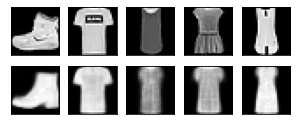

EPOCH >> 7


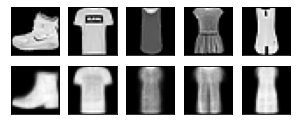

EPOCH >> 8


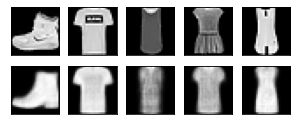

EPOCH >> 9


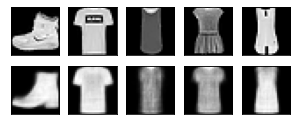

EPOCH >> 10


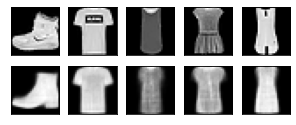

EPOCH >> 11


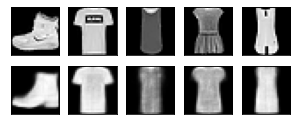

EPOCH >> 12


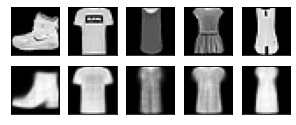

EPOCH >> 13


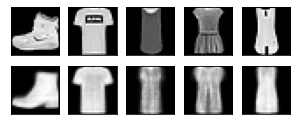

EPOCH >> 14


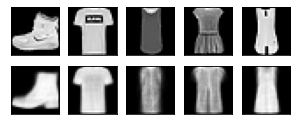

EPOCH >> 15


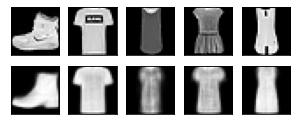

EPOCH >> 16


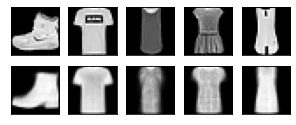

EPOCH >> 17


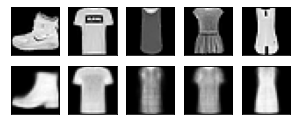

EPOCH >> 18


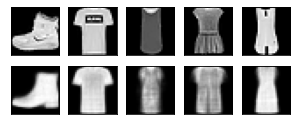

EPOCH >> 19


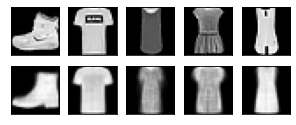

EPOCH >> 20


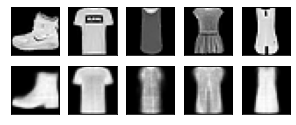

EPOCH >> 21


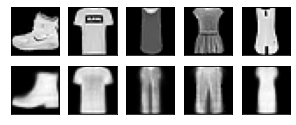

EPOCH >> 22


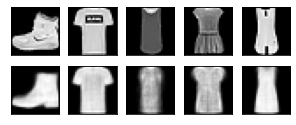

EPOCH >> 23


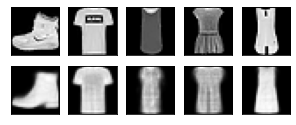

EPOCH >> 24


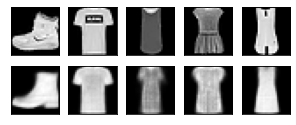

EPOCH >> 25


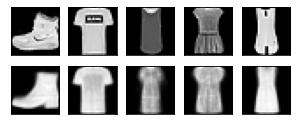

EPOCH >> 26


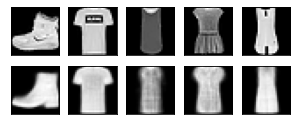

EPOCH >> 27


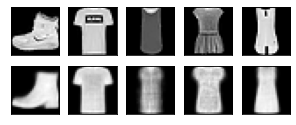

EPOCH >> 28


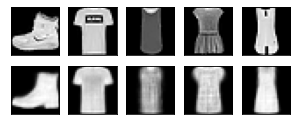

EPOCH >> 29


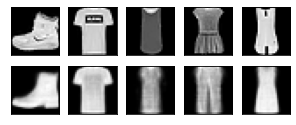

EPOCH >> 30


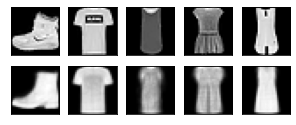

EPOCH >> 31


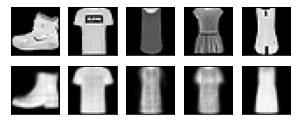

EPOCH >> 32


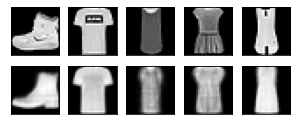

EPOCH >> 33


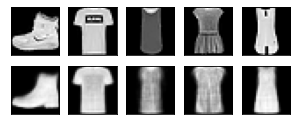

EPOCH >> 34


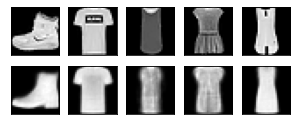

EPOCH >> 35


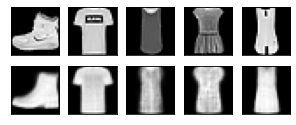

EPOCH >> 36


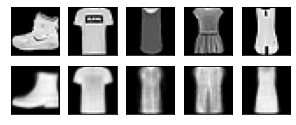

EPOCH >> 37


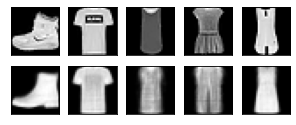

EPOCH >> 38


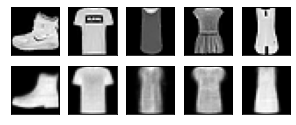

EPOCH >> 39


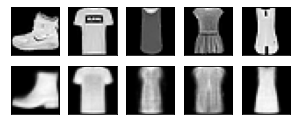

EPOCH >> 40


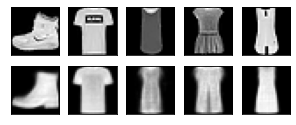

EPOCH >> 41


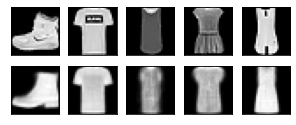

EPOCH >> 42


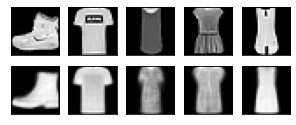

EPOCH >> 43


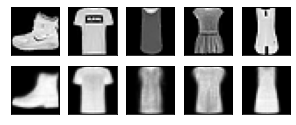

EPOCH >> 44


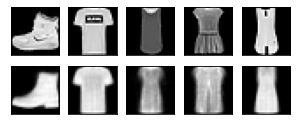

EPOCH >> 45


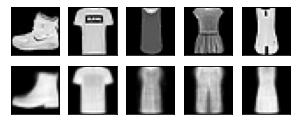

EPOCH >> 46


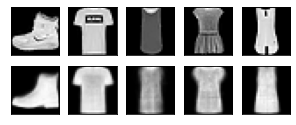

EPOCH >> 47


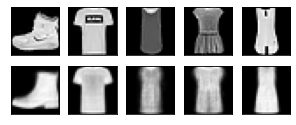

EPOCH >> 48


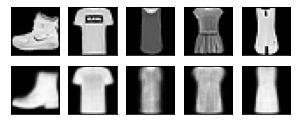

EPOCH >> 49


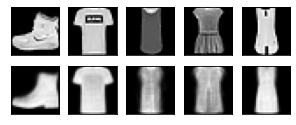

EPOCH >> 50


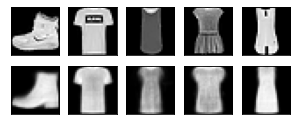

In [11]:
for epoch in range(1,EPOCH+1):
    train(autoencoder, train_loader)
    
    test_x = view_data.to(DEVICE)
    _, decoded_data = autoencoder(test_x)
    
    f,a = plt.subplots(2,5,figsize=(5,2))
    print(f"EPOCH >> {epoch}")
    
    for i in range(5):
        img = np.reshape(view_data.data.numpy()[i],(28,28))
        a[0][i].imshow(img,cmap='gray')
        a[0][i].set_xticks(())
        a[0][i].set_yticks(())
    
    for i in range(5):
        img = np.reshape(decoded_data.to("cpu").data.numpy()[i],(28,28))
        a[1][i].imshow(img,cmap='gray')
        a[1][i].set_xticks(())
        a[1][i].set_yticks(())
    plt.show()
        
        
    

### latent variable 시각화

In [9]:
# 잠재변수를 3D 플롯으로 시각화
view_data = trainset.data[:200].view(-1, 28*28)
view_data = view_data.type(torch.FloatTensor)/255.
test_x = view_data.to(DEVICE)
encoded_data, _ = autoencoder(test_x)
encoded_data = encoded_data.to("cpu")

C:\Users\vkdvk\AppData\Local\Temp/ipykernel_18720/684143230.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


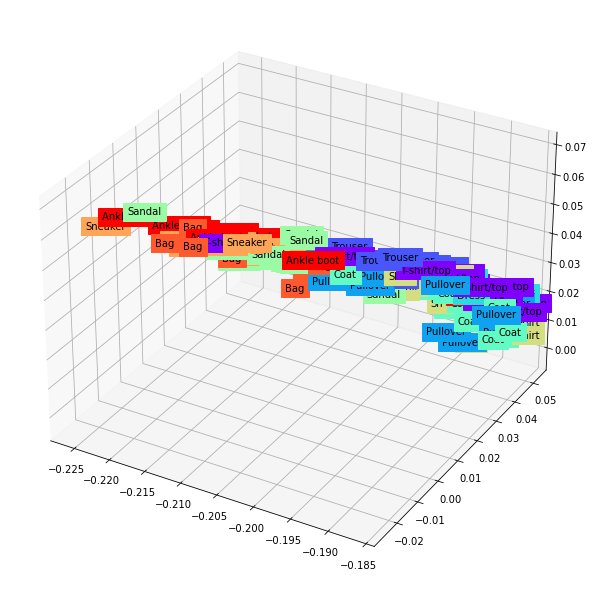

In [10]:
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

X = encoded_data.data[:, 0].numpy()
Y = encoded_data.data[:, 1].numpy()
Z = encoded_data.data[:, 2].numpy()

labels = trainset.targets[:200].numpy()

for x, y, z, s in zip(X, Y, Z, labels):
    name = CLASSES[s]
    color = cm.rainbow(int(255*s/9))
    ax.text(x, y, z, name, backgroundcolor=color)

ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())
plt.show()